In [1]:
using Plots

include("src/PolyColoid.jl")
using .PolyColoid

In [2]:
coloid = Coloid(144, 4, 1 / √2, (20, 20))
crystal_initialize!(coloid, 12, (20/12, 20/12), (20/24, 20/24))

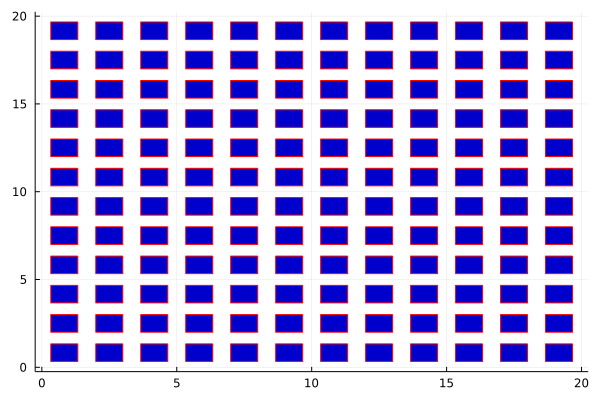

In [3]:
plot(coloid, legend=false)

In [4]:
simulate!(coloid, 20/24, π/2; steps = 1000)

(0.22244094488188976, 0.8556910569105691)

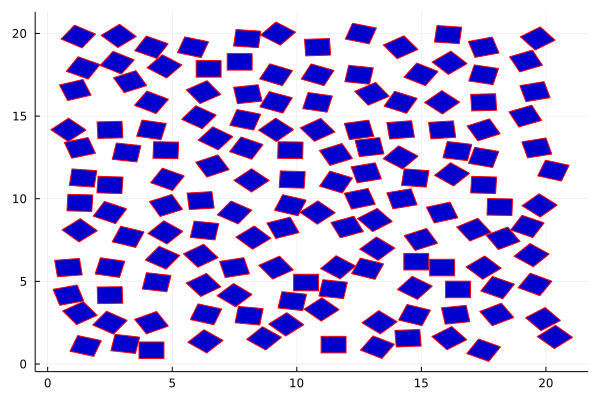

In [5]:
plot(coloid, legend=false)